In [4]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch

import scSLAT
from scSLAT.model import run_SLAT_multi,load_anndatas, Cal_Spatial_Net, run_SLAT, scanpy_workflow, spatial_match
from scSLAT.viz import match_3D_multi, build_3D, hist, Sankey, match_3D_celltype
from scSLAT.metrics import region_statistics

In [9]:
sc.set_figure_params(dpi=150, dpi_save=150)

In [2]:
adata1 = sc.read_h5ad('./adata1.h5ad')
adata2 = sc.read_h5ad('./adata2.h5ad')

In [5]:
embd0 = pd.read_csv('./seurat_embd0.csv')
embd1 = pd.read_csv('./seurat_embd1.csv')
embd0 = torch.from_numpy(embd0.to_numpy())
embd1 = torch.from_numpy(embd1.to_numpy())

In [6]:
best, index, distance = spatial_match([embd0, embd1],smooth=False)
matching = np.array([range(index.shape[0]), best])

In [7]:
adata1_df = pd.DataFrame({'index':range(embd0.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index':range(embd1.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})
matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]
region_statistics(best_match,start=0.5,number_of_interval=10)

0.500~0.550        14          0.140%
0.550~0.600       109          1.090%
0.600~0.650       300          3.000%
0.650~0.700       675          6.751%
0.700~0.750      1020         10.201%
0.750~0.800      1450         14.501%
0.800~0.850      1647         16.472%
0.850~0.900      1611         16.112%
0.900~0.950      1854         18.542%
0.950~1.000      1318         13.181%


/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/Dragon/viz/multi_dataset.py:231: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



dataset1: 18 cell types; dataset2: 22 cell types; 
                    All :29 celltypes; Overlap: 11 cell types 
                    Not ovelap :[['Sclerotome', 'Spinal cord', 'Inner ear', 'Surface ectoderm', 'Branchial arch', 'Head mesenchyme', 'Dermomyotome', 'Sympathetic nerve', 'Epidermis', 'Ovary', 'Pancreas', 'Kidney', 'Cartilage primordium', 'Muscle', 'Mesentery', 'Mesothelium', 'Mucosal epithelium', 'Choroid plexus']]
Just subsample 7999 cell pairs from 9999


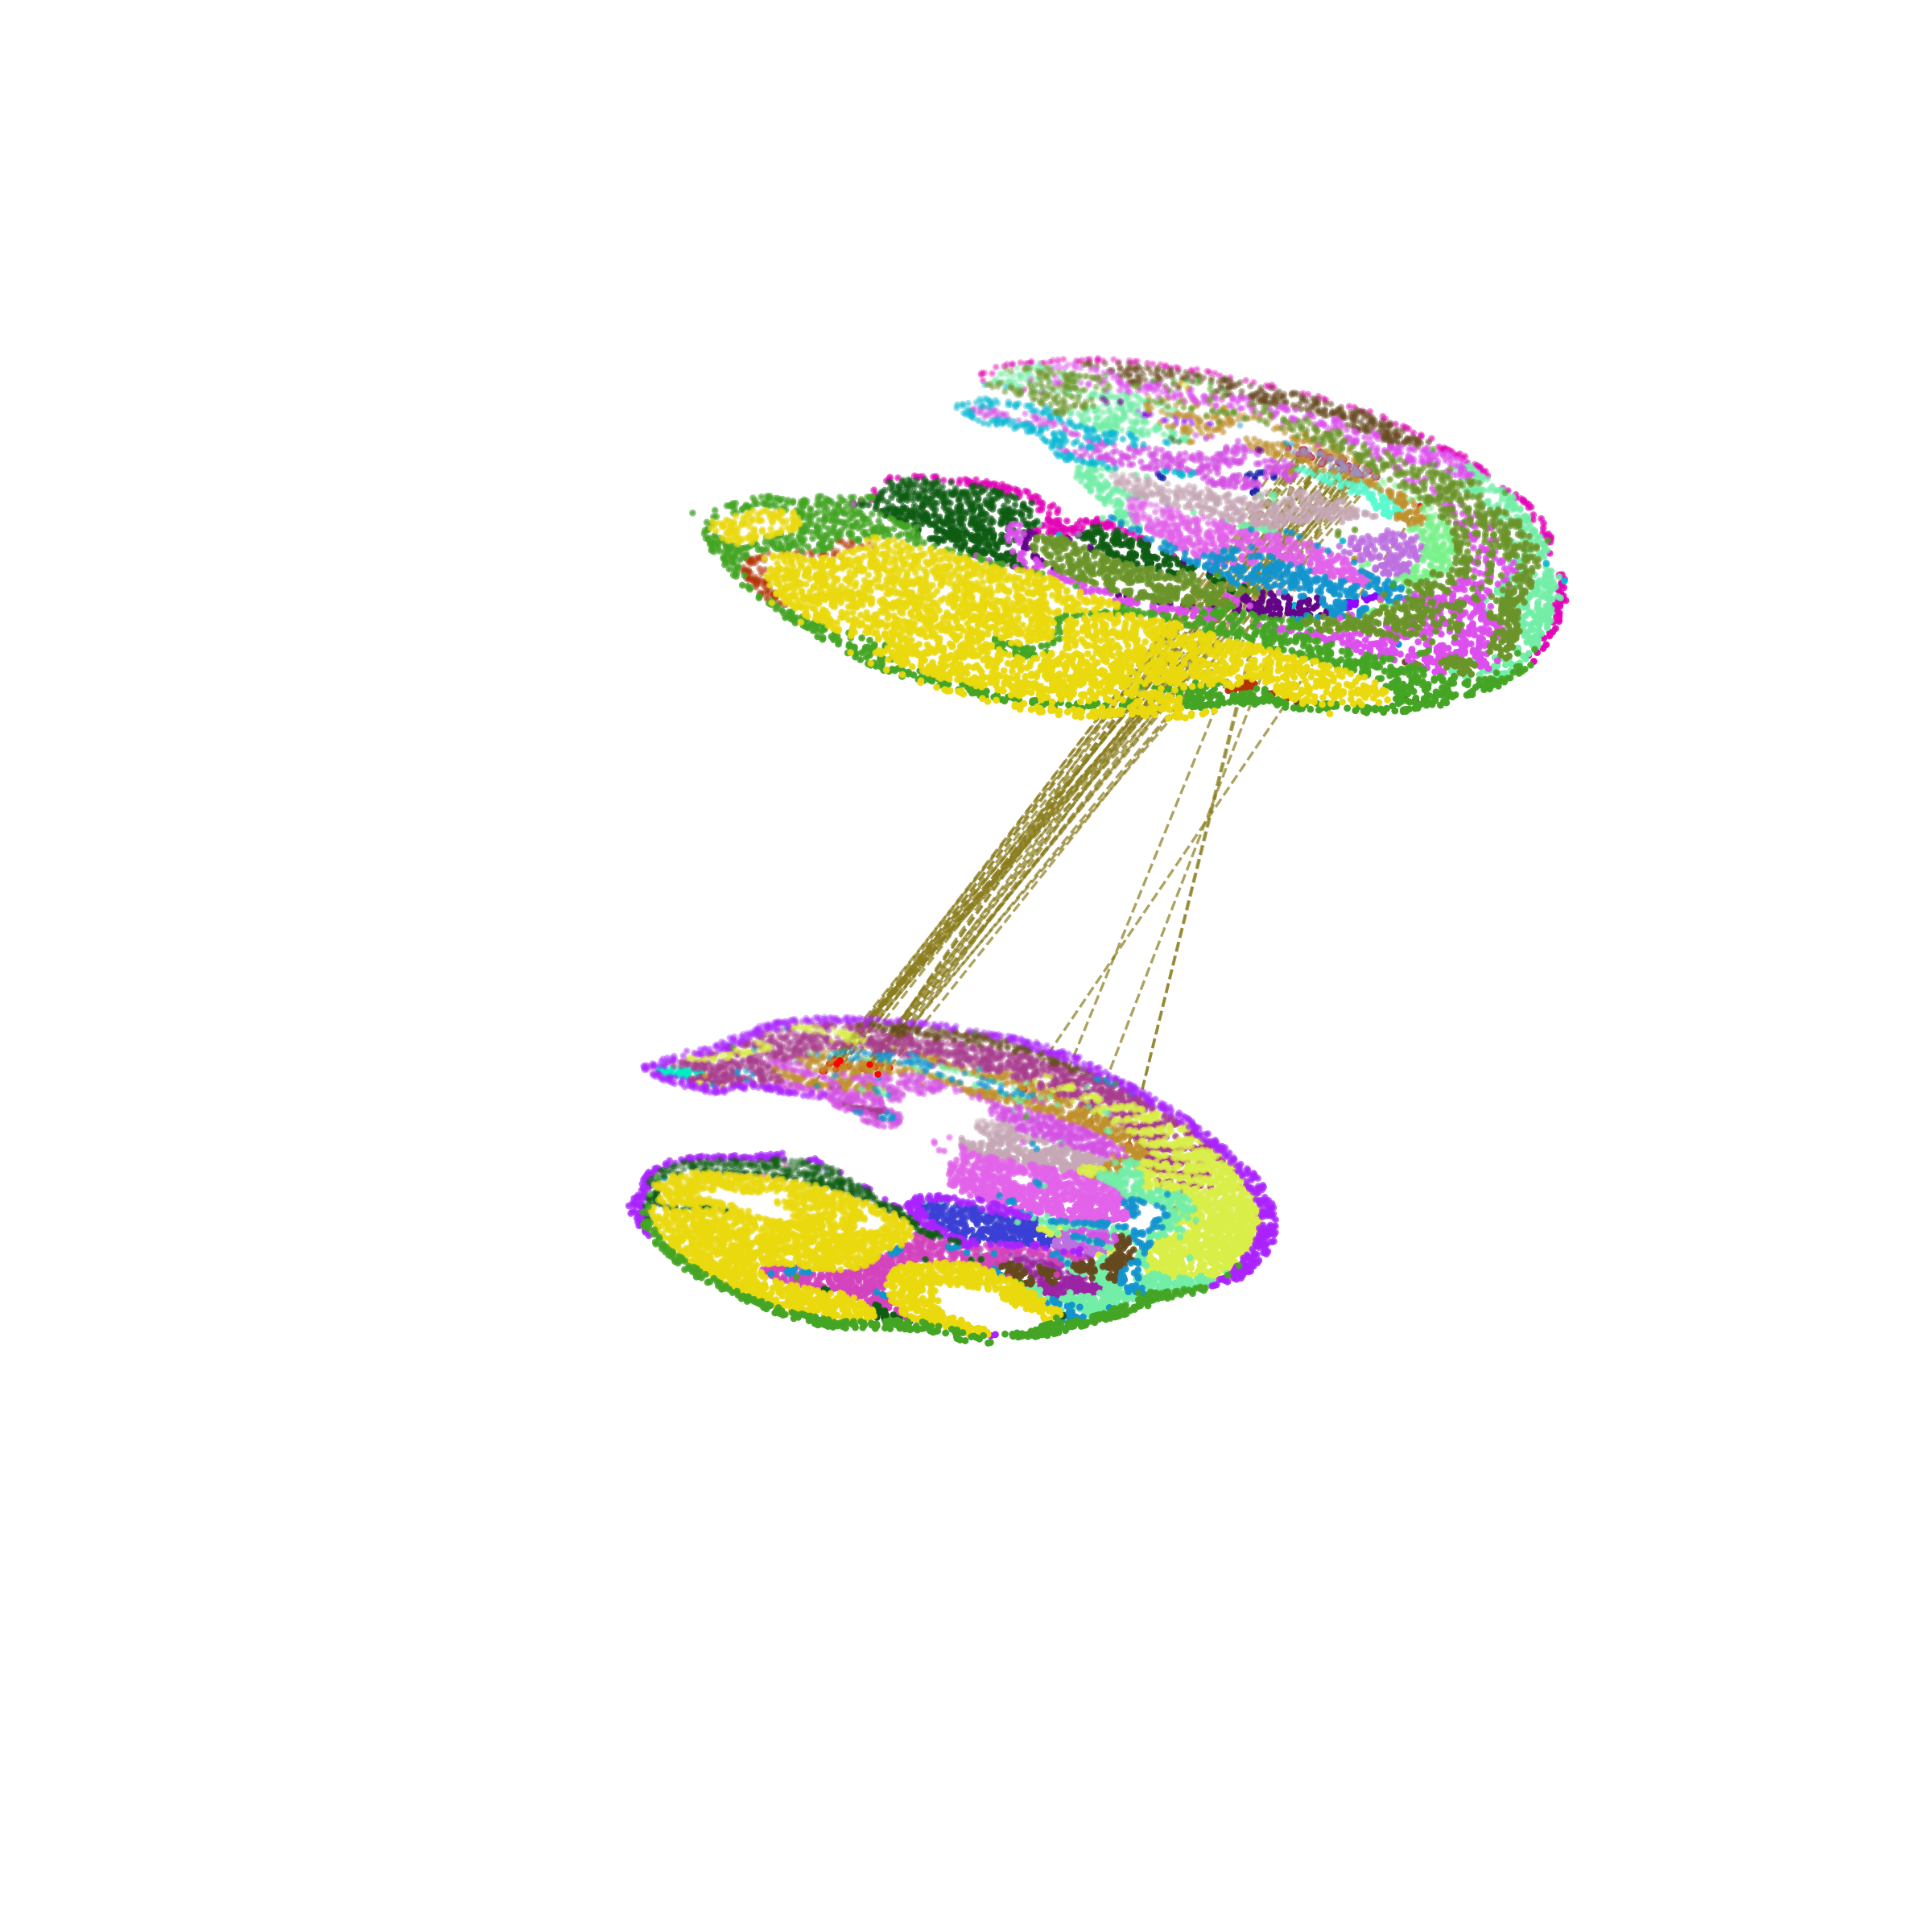

In [15]:
test = match_3D_celltype(adata1_df, adata2_df, matching, meta='celltype', highlight_celltype = [['Urogenital ridge'],['Kidney']],
                         subsample_size=7999, highlight_cell = ['red'])
test.draw_3D(size= [10, 12],line_width =0.8,point_size=[1.2,1.2], hide_axis=True)